# Avocado Price Prediction through Machine Learning

# Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g.greenskins) are not included in this table.


# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category=DeprecationWarning)

import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Importing Dataset

In [3]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The dataset contains weekly retail scan data for National Retail Volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The column AveragePrice is the average price of a single avocado.

This is the data that we have to predict for future samples.

In [4]:
# Dropping the column "Unnamed" as it is just representation of the indexs, so it is useless to keep it.
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.shape

(18249, 13)

In [7]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Here we can see that we don't have any missing values(16467 rows) and 13 columns. Now let's do some Feature Engineering on the Date Feature in pre-processing later so we can be able to use the day and the  month columns in building our machine learning model later.

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that there is no missing values in the dataset.

# Data Pre-processing and Cleaning

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [12]:
df.head() # Here date is converted to Month and Day columns

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Exploratory Data Analysis

In [13]:
# Now lets see which Avocados are more in demand ( Conventional or Organic)

Text(0, 0.5, 'Type of Avocados in more demand')

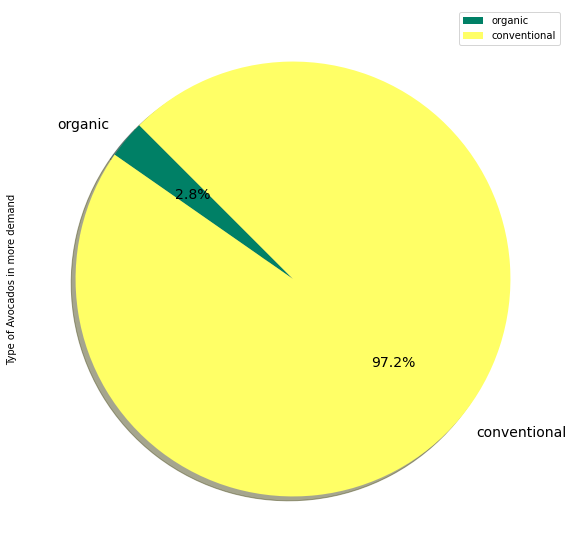

In [14]:
df.groupby(['type'])['Total Volume'].mean().sort_values().plot(kind='pie',fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Type of Avocados in more demand')

In [15]:
# Lets check which range Average price lies and what is distribution look like

<AxesSubplot:xlabel='AveragePrice'>

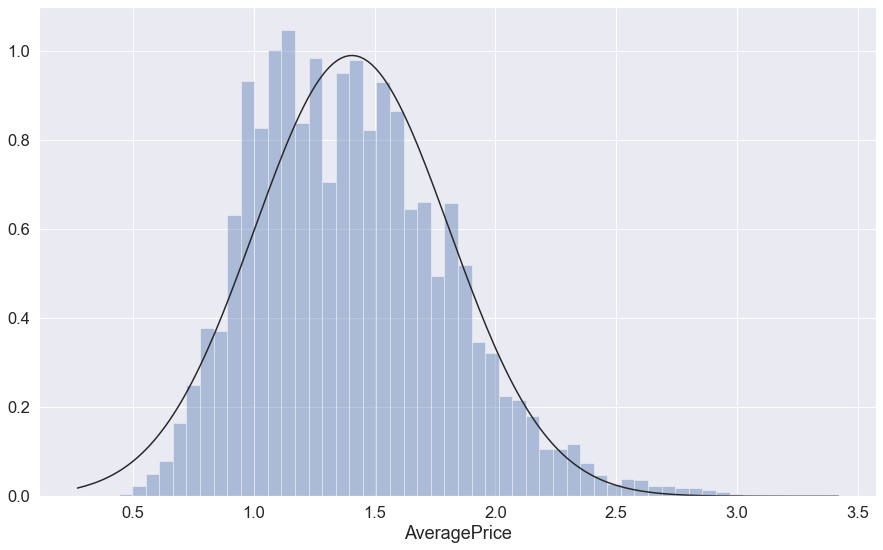

In [16]:
sns.set(font_scale=1.5)
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,9))
sns.distplot(a=df.AveragePrice,kde=False,fit=norm)

* Average Price distribution shows that for most cases price of avocado is between 1.1 and 1.6 dollars.

# Now lets check Average price distribution over the months for conventional and Organic types

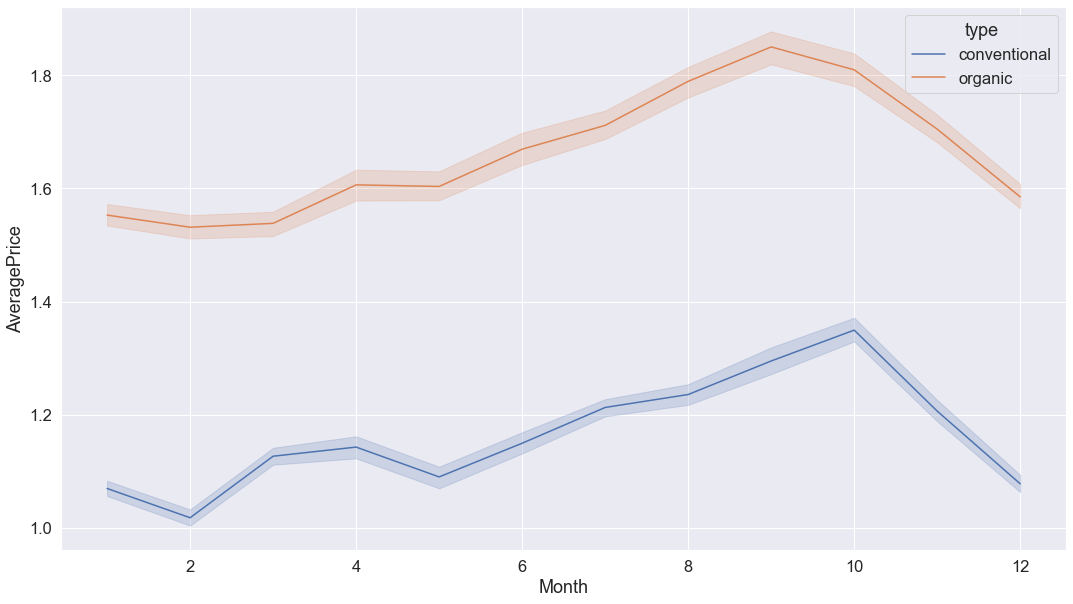

In [156]:
plt.figure(figsize=(18,10))
sns.lineplot(x='Month',y='AveragePrice', hue='type', data=df)
plt.show()

* Here we can see the hike is visible between 8-10 months for both Conventional and Organic type of Avocados proces.

# Let's check TOP 5 region where Average price are very high

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

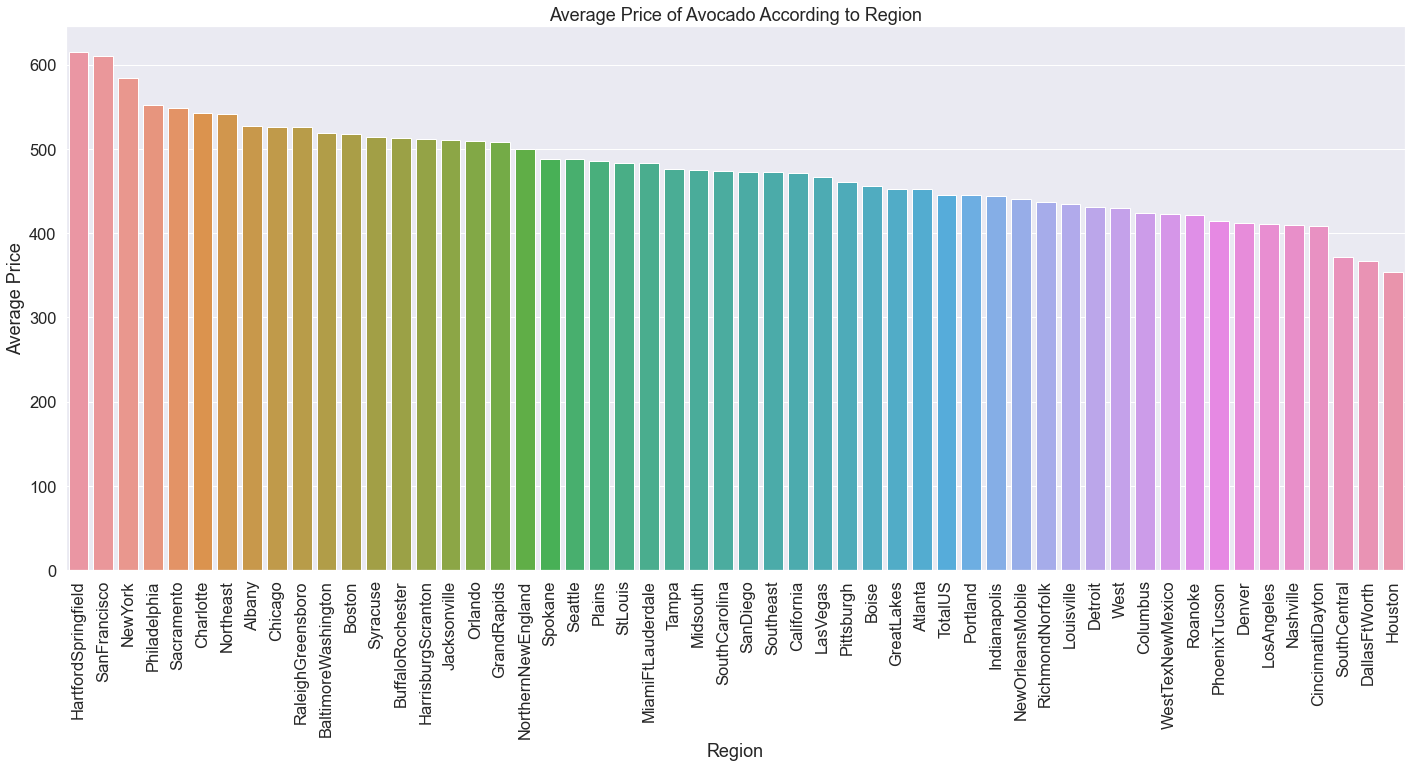

In [18]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)
    average_price.append(region_average)
    
df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

* Prices are very high at below mention region:
    * HartFordSringfield
    * SanFrancisco
    * NewYork
    * Philadelphia
    * Sacramento

# Top 5 regions where Average consumption is very high 

Text(0.5, 1.0, 'Average of Total Volume According to Region')

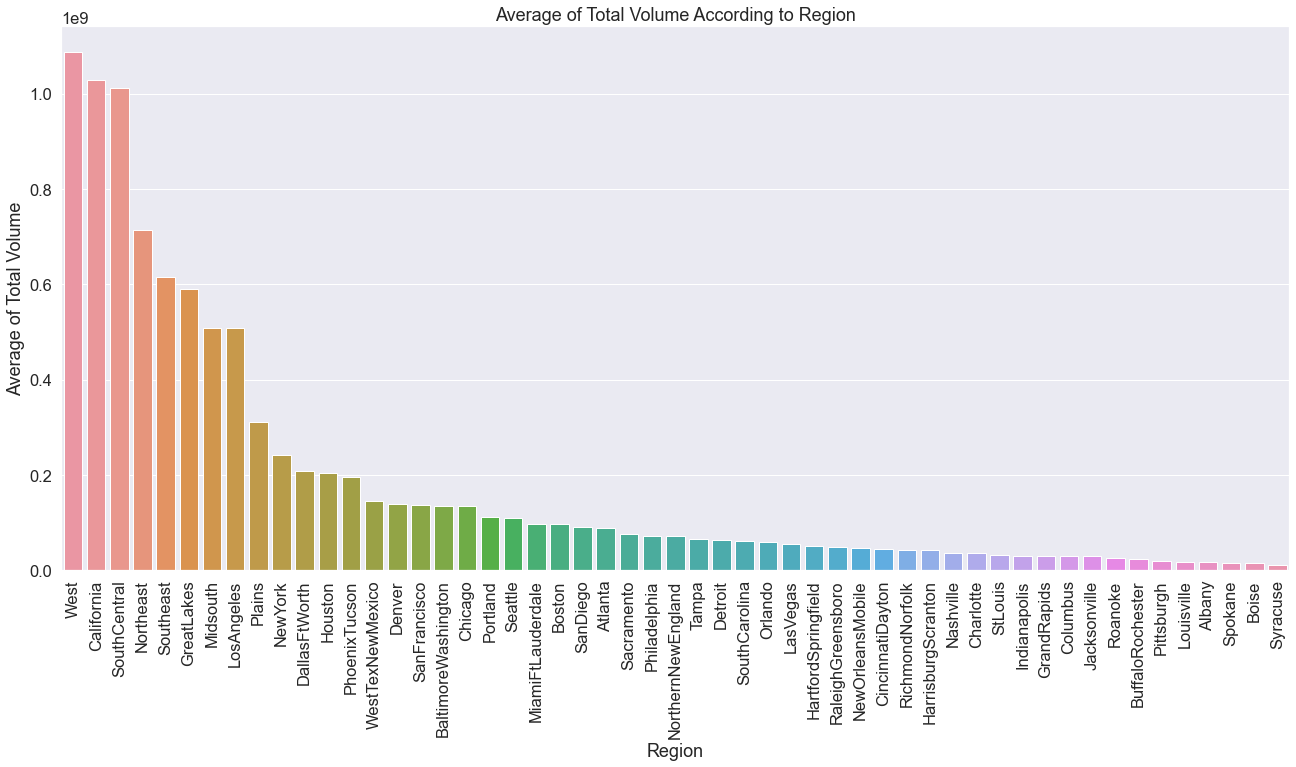

In [19]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume']))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title("Average of Total Volume According to Region")

* Consumption is very high in below mentioned regions:
    * California
    * SouthCentral
    * West
    * NOrtheast
    * Southeast

# Lets check in which year and for which region was the Average price the highest 

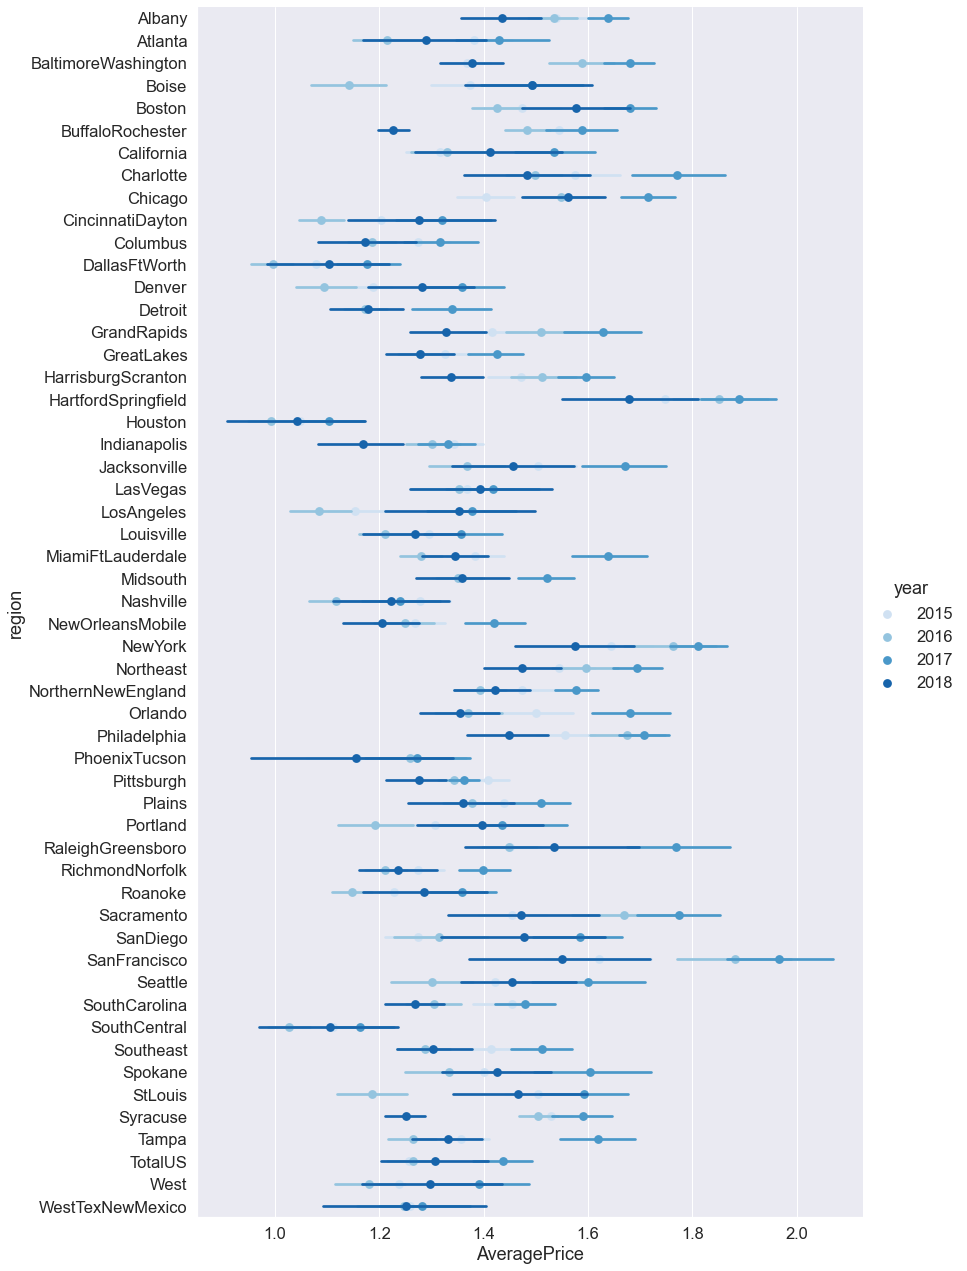

In [20]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
            )

# Lets see how price is distributed over the date column

Text(0.5, 1.0, 'Average Price')

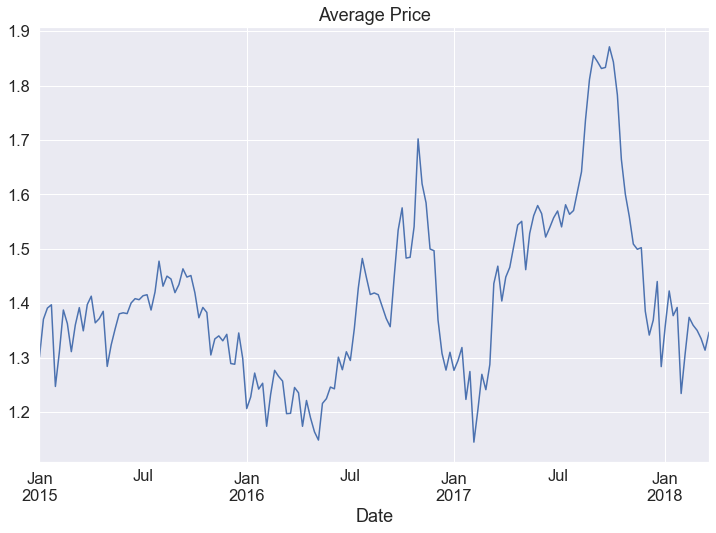

In [21]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

* There was a huge hike in prices after July 2017 and before Jan 2018.

<AxesSubplot:xlabel='type'>

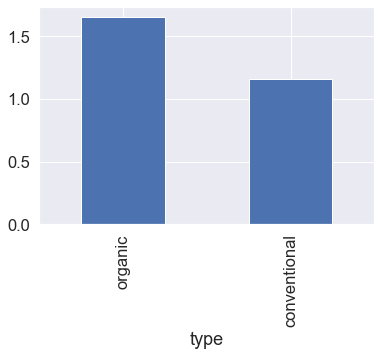

In [22]:
df.groupby('type').mean()['AveragePrice'].sort_values(ascending=False).plot(kind='bar')

In [164]:
# Now we will check for correlation of dataset features with each other.

<AxesSubplot:>

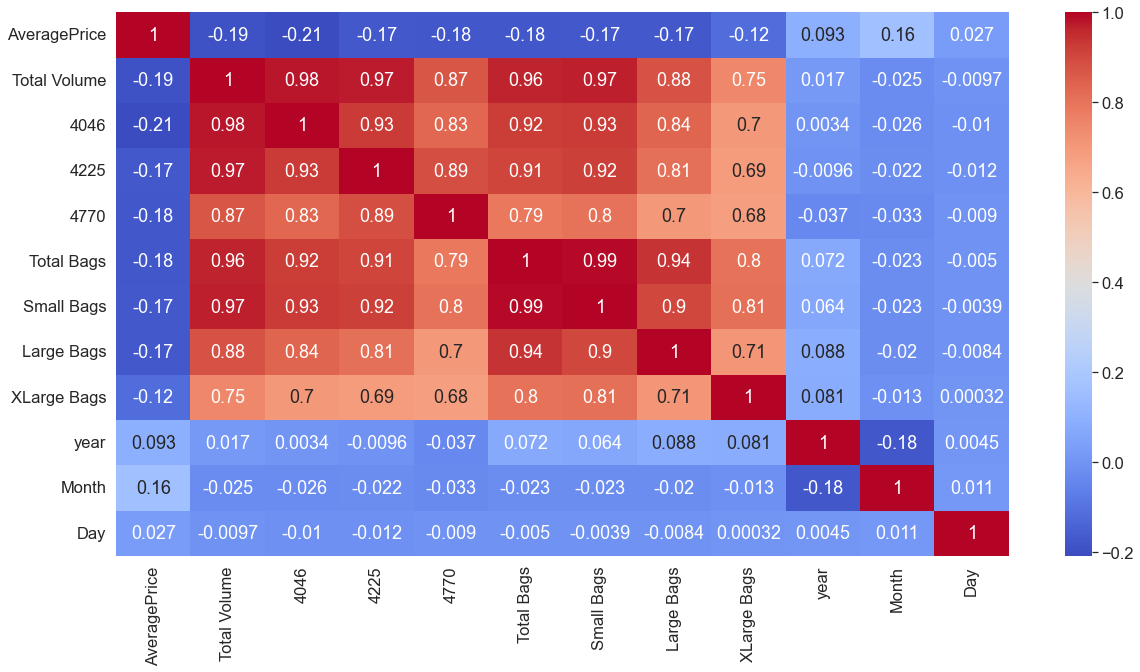

In [165]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

* As we can see from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other.

* First we have to do some Feature Engineering on the categorical Features : region and type

# Feature Engineering For Model building 


In [23]:
df['region'].nunique()

54

In [24]:
df['type'].nunique()

2

* There are 51 regions and 1 Unique types, so it's going to be easy to transform the type feature to dummies, but for the region its going to be a bit complex,so the entire column to be drooped.

In [25]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [26]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


# Model selection/predictions

* Now data is ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.
* Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and y array with the target variable.

# Splitting X and Y into training and test datasets

In [27]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
print(X.shape)
print(y.shape)

(18249, 12)
(18249,)


X Has the independent variables except Average price which we need to predict

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Data Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
16391,5376.58,147.41,871.40,0.00,4357.77,4351.10,6.67,0.0,2017,11,12,1
4990,578610.94,155537.61,153030.46,21523.37,248519.50,144796.06,103723.44,0.0,2016,1,10,0
13653,6470.08,2026.07,2529.20,0.00,1914.81,1848.75,66.06,0.0,2016,11,27,1
2074,145648.40,78195.76,38763.75,134.25,28554.64,25981.67,2572.97,0.0,2015,2,8,0
12377,40535.05,162.25,38677.24,0.00,1695.56,1695.56,0.00,0.0,2016,6,12,1


In [31]:
X_test.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
8604,218329.70,79239.58,26356.05,2998.74,109735.33,73393.34,34338.97,2003.02,2018,2,11,0
2608,391514.43,228324.13,72749.38,100.62,90340.30,44449.47,45890.83,0.00,2015,11,1,0
14581,3907.40,1147.09,39.51,0.00,2720.80,2717.47,3.33,0.00,2016,1,24,1
4254,267953.78,150786.30,27025.48,565.65,89576.35,74664.71,14911.64,0.00,2016,3,6,0
16588,8805.28,828.39,3.24,0.00,7973.65,7456.43,517.22,0.00,2017,2,19,1


In [32]:
y_train.head()

16391    1.88
4990     0.81
13653    2.01
2074     1.02
12377    1.53
Name: AveragePrice, dtype: float64

In [33]:
y_test.head()

8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
Name: AveragePrice, dtype: float64

# Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred_train_lr =lr.predict(X_train)
print(y_pred_train_lr)
y_pred_test_lr=lr.predict(X_test)
print(y_pred_test_lr)

[1.79254214 1.0265061  1.75454861 ... 1.12371818 1.11174511 1.60527088]
[1.16389498 1.16808591 1.5508444  ... 0.98692868 1.69786667 1.71701862]


# Model Evaluation for Linear Regression model

In [36]:
# R-Square metric

In [37]:
from sklearn.metrics import r2_score
R2_train_lr = r2_score(y_train,y_pred_train_lr)
R2_test_lr = r2_score(y_test,y_pred_test_lr)
print('R2 for training set is {}'. format(R2_train_lr))
print('R2 for test set is {}'.format(R2_test_lr))

R2 for training set is 0.44021406715748557
R2 for test set is 0.43307059346803856


,Y Test,Pred
8604,0.82,1.163895
2608,0.97,1.168086
14581,1.44,1.550844
4254,0.97,1.070764
16588,1.45,1.618120


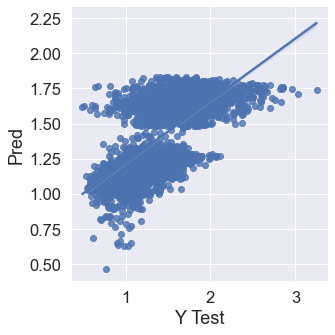

In [38]:
data = pd.DataFrame({'Y Test':y_test,'Pred':y_pred_test_lr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

As we can see that we don't have a straight line so I am not sure that this is the best model we can apply on our data

In [39]:
# Adjusted R-Squared Metric 

In [40]:
def Adjusted_r2(r_square,N):
    return(1-(((1-r_square)*(N-1))/(N-13)))

In [42]:
adj_r2_train=Adjusted_r2(R2_train_lr,len(X_train))
print('The Adjusted r-aquare of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_lr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted r-aquare of Linear Regression Train Dataset is : 0.4397535275171379
The Adjusted R-square of Linear Regression Test Dataset is : 0.43120005377093007


# Decision Tree Model 

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [47]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

,Y Test,Pred
0,NaN,0.78
1,NaN,0.99
2,NaN,1.34
3,NaN,0.94
4,NaN,1.43


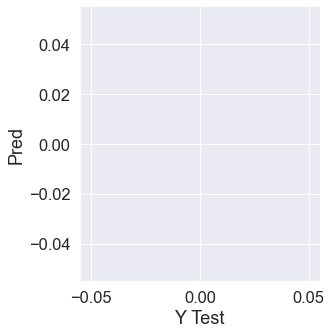

In [51]:
data=pd.DataFrame({'y Test':y_test,'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# R-Square metric

In [53]:
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 1.0
R2 for test set is 0.7133674671541632


In [54]:
# Adjusted R- Square Metric

In [55]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 1.0
The Adjusted R-square of Linear Regression Test Dataset is : 0.7124217452970969


# Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [62]:
y_pred_train_rdr=rdr.predict(X_train)
y_pred_test_rdr=rdr.predict(X_test)

In [63]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_test_rdr))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test_rdr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rdr)))

MAE: 0.10055180821917808
MSE: 0.02137479944931507
RMSE: 0.14620122930165488


,Y Test,Pred
8604,0.82,0.9569
2608,0.97,1.0007
14581,1.44,1.4112
4254,0.97,0.9114
16588,1.45,1.4579


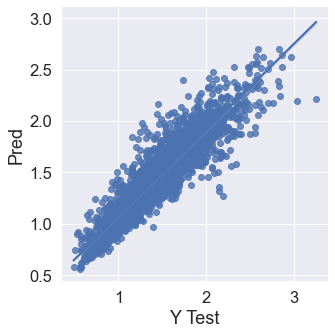

In [64]:
data=pd.DataFrame({'Y Test':y_test,'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [65]:
# R-Square metric

In [66]:
R2_train_rdr=r2_score(y_train,y_pred_train_rdr)
R2_test_rdr=r2_score(y_test,y_pred_test_rdr)

In [67]:
print('R2 for training is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training is 0.9821295826941652
R2 for test set is 0.8669638302034122


# Random Forest Model 2


In [68]:
rdr= RandomForestRegressor(random_state = 0,
                              n_estimators = 15,
                              min_samples_split = 2,
                              min_samples_leaf = 1)
rdr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15, random_state=0)

In [69]:
y_pred_train_rdr=rdr.predict(X_train)
y_pred_test_rdr=rdr.predict(X_test)

In [70]:
# Model Evaluation for model 2

In [72]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_test_rdr))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test_rdr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rdr)))

MAE: 0.10548785388127854
MSE: 0.023512685783866057
RMSE: 0.15333846804982126


,Y Test,Pred
8604,0.82,0.893333
2608,0.97,1.014000
14581,1.44,1.364667
4254,0.97,0.898000
16588,1.45,1.472000


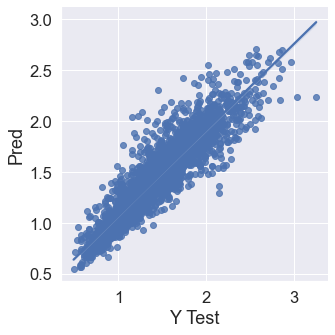

In [73]:
data=pd.DataFrame({'Y Test':y_test,'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [74]:
# R-Square metric

In [75]:
R2_train_rdr = r2_score(y_train,y_pred_train_rdr)
R2_test_rdr = r2_score(y_test,y_pred_test_rdr)

In [76]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9760224201781063
R2 for test set is 0.8536576838658266


# Model Evaluation Results

As per the Model Evaluation results section, it is clear that Random Forest Mosel 1 is giving the best Prediction Result as compared to other model.

# Conclusions

* With the help of notebook I learnt how EDA can be carried out using Pandas and other plotting libraries.
* Also I have seen making use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
* I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. I also learnt how to create new features which will in turn help us to better predict the survival.
* I have seen the impact of columns like type, year/date on the Average price increase/decrease rate.
* The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly positively and negatively coorelated with.
* I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
* This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.